# Key Performance Indicators

1. Trips based on Temperature

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from IPython.display import display, HTML
display(HTML(""))
import scienceplots
plt.style.use(['science', 'no-latex'])

In [2]:
# import prepared data set
df_la = pd.read_csv("prepared_data.csv", parse_dates=["start_time","end_time","Date"],low_memory=False)
df_weather = pd.read_csv("prepared_data_weather.csv", parse_dates=["date_time"],low_memory=False)

In [33]:
df_la.head(1)

,Unnamed: 0_x,date_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,duration,...,Month,Weekday,Hour,Unnamed: 0_y,max_temp,min_temp,precip,year,temp,num_trips
0,0,2019-01-01,2019-01-01 00:14:00,3046,3051,06468,Walk-up,2nd & Hill,7th & Broadway,7.0,...,1,1,0,35063.0,15.6,15.6,0.0,2019.0,15.6,285.0


In [34]:
df_weather.head(1)

,Unnamed: 0,date_time,max_temp,min_temp,precip,year,temp,num_trips
0,35040,2019-01-01 01:00:00,15.6,15.6,0.0,2019.0,15.6,120


In [5]:
df_la[(df_la["Month"] == 1) & (df_la["Day"] == 1) & (df_la["Hour"] == 1)].size


120

In [6]:
df_la[(df_la["Date"] == "2019-01-01")&(df_la["Hour"] == 1)].size

120

In [7]:
def get_trips(datetime):
    return df_la[(df_la["Month"] == datetime.month) &(df_la["Day"] == datetime.day) & (df_la["Hour"] == datetime.hour)].size


In [8]:
df_weather["num_trips"] = df_weather["date_time"].apply(get_trips)

In [35]:
df_weather.head(1)

,Unnamed: 0,date_time,max_temp,min_temp,precip,year,temp,num_trips
0,35040,2019-01-01 01:00:00,15.6,15.6,0.0,2019.0,15.6,120


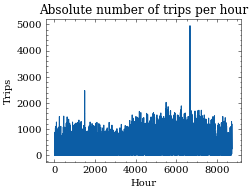

In [10]:
plt.plot(df_weather.index, df_weather["num_trips"], label='Trips per hour')
plt.title('Absolute number of trips per hour')
plt.ylabel('Trips')
plt.xlabel('Hour')
plt.show()

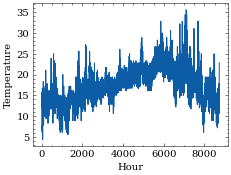

In [11]:
plt.plot(df_weather.index, df_weather["temp"], label='Trips per hour')
plt.ylabel('Temperature')
plt.xlabel('Hour')
plt.show()

In [36]:
def replace_minutes(dt):
    return dt.replace(minute=0, second=0)

In [38]:
df_la.rename(columns={'start_time':'date_time'}, inplace=True)
df_la["date_time"] = df_la["date_time"].apply(replace_minutes)
df_la.tail(3)

,Unnamed: 0_x,date_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,duration,...,Month,Weekday,Hour,Unnamed: 0_y,max_temp,min_temp,precip,year,temp,num_trips
297892,290339,2019-12-31 23:00:00,2019-12-31 23:47:41,3051,3064,12298,Annual Pass,7th & Broadway,Grand & 8th,4.0,...,12,1,23,43822.0,22.8,22.8,0.0,2019.0,22.8,255.0
297893,290340,2019-12-31 23:00:00,2019-12-31 23:53:55,3064,3074,19053,Annual Pass,Grand & 8th,Hope & Olympic,5.0,...,12,1,23,43822.0,22.8,22.8,0.0,2019.0,22.8,255.0
297894,290341,2019-12-31 23:00:00,2020-01-01 00:25:27,3074,3049,19053,Annual Pass,Hope & Olympic,2nd & Figueroa,26.0,...,12,1,23,43822.0,22.8,22.8,0.0,2019.0,22.8,255.0


In [16]:
df_la = pd.merge(df_la, df_weather, how="left", on =["date_time"])
df_la.head(3)

,Unnamed: 0_x,date_time,end_time,start_station_id,end_station_id,bike_id,user_type,start_station_name,end_station_name,duration,...,Month,Weekday,Hour,Unnamed: 0_y,max_temp,min_temp,precip,year,temp,num_trips
0,0,2019-01-01,2019-01-01 00:14:00,3046,3051,06468,Walk-up,2nd & Hill,7th & Broadway,7.0,...,1,1,0,35063.0,15.6,15.6,0.0,2019.0,15.6,285.0
1,1,2019-01-01,2019-01-01 00:14:00,3046,3051,12311,Walk-up,2nd & Hill,7th & Broadway,6.0,...,1,1,0,35063.0,15.6,15.6,0.0,2019.0,15.6,285.0
2,2,2019-01-01,2019-01-01 00:50:00,3030,3075,05992,Walk-up,Main & 1st,Broadway & 9th,32.0,...,1,1,0,35063.0,15.6,15.6,0.0,2019.0,15.6,285.0


In [39]:
data_t = pd.DataFrame()
data_t['temp_count'] = df_la["temp"].value_counts()
data_t.sort_index(inplace=True)
data_t.head(5)

,temp_count
4.4,49
5.6,255
6.1,326
6.7,753
7.2,928


Text(0, 0.5, 'Trips')

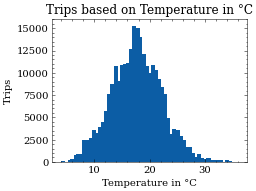

In [40]:
plt.bar(data_t.index, data_t["temp_count"], label='Trips for each Temperature')
plt.title("Trips based on Temperature in °C")
plt.xlabel('Temperature in °C') 
plt.ylabel('Trips')

In [42]:
data_t.max()

temp_count    15261
dtype: int64

In [43]:
data_t.idxmax()

temp_count    17.2
dtype: float64

Most of the rides are performed at a temperature of 17.2°C.